In [1]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt
plt.style.use('default')

In [2]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

In [3]:
LOANS_INCOME_CSV = DATA / 'loans_income.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'

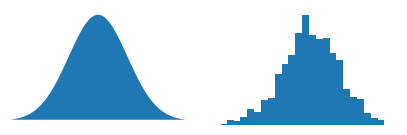

In [4]:
# https://m.blog.naver.com/pmw9440/221805677577: 정규분포 그리기
np.random.seed(seed=1)
x = np.linspace(-3, 3, 300)
xsample = stats.norm.rvs(size = 1000)

fig, axes = plt.subplots(ncols = 2, figsize = (5, 1.5))
ax = axes[0]
ax.fill(x, stats.norm.pdf(x))
# subplot의 축을 끄기
ax.set_axis_off()
ax.set_xlim(-3, 3)

ax = axes[1]
ax.hist(xsample, bins = 30)
ax.set_axis_off()
ax.set_xlim(-3, 3)
# set_position: 축 위치 설정: https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=jung2381187&logNo=220408716017
ax.set_position

plt.show()

In [6]:
# 파싱된 데이터에 열이 하나만 포함된 경우 pandas series return
loans_income = pd.read_csv(LOANS_INCOME_CSV).squeeze('columns')
loans_income

0         67000
1         52000
2        100000
3         78762
4         37041
          ...  
49995     40000
49996     54000
49997     50000
49998     82000
49999     70000
Name: x, Length: 50000, dtype: int64

In [7]:
sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

In [8]:
results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.isnull().sum())
results.head()

income    0
type      0
dtype: int64


,income,type
40292,63000.0,Data
38959,92000.0,Data
17361,134000.0,Data
33996,52000.0,Data
26491,43000.0,Data


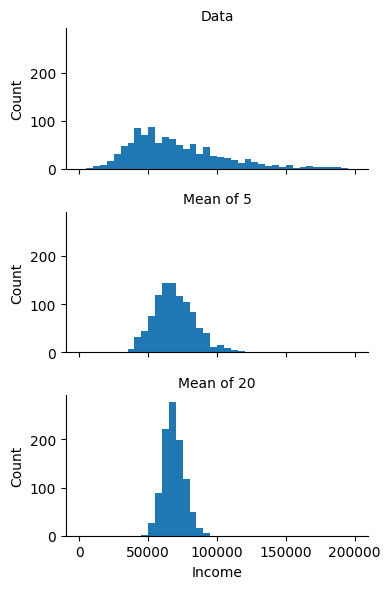

In [9]:
grid = sns.FacetGrid(data = results, col = 'type', col_wrap = 1,
             height = 2, aspect = 2)
grid.map(plt.hist, 'income', range = [0, 200_000], bins = 40)
grid.set_axis_labels('Income', 'Count')
grid.set_titles('{col_name}')

plt.tight_layout()
plt.show()

In [9]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_income) # 동일한 개수만큼 resampling - Bootstrap의 원리
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}') # 평균 - 원본 표본 중위값
print(f'std error: {results.std()}') # 원본 표본의 표준오차 = Bootstrap 결과의 표본편차

Bootstrap Statistics:
original: 62000.0
bias: -82.09799999999814
std error: 228.73933106830927


68760.51844
55734.1


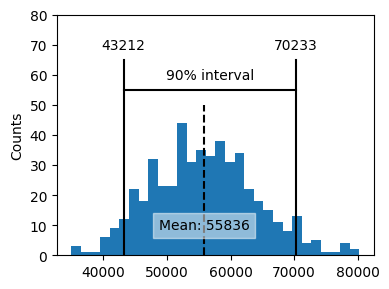

In [36]:
print(loans_income.mean())
np.random.seed(seed=3)  
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)
print(sample20.mean())

results = []
for nrepeat in range(500):
    sample = resample(sample20) # 동일한 개수만큼 resampling
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black') # confidence_interval 사이 직선
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black') # (x,0) 과 (x,65) 직선
    ax.text(x, 70, f'{x:.0f}', horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

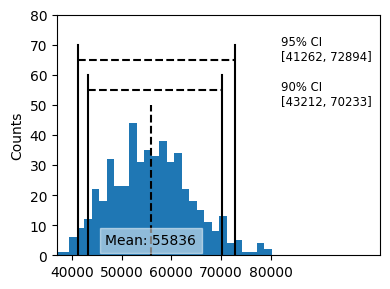

In [38]:
np.random.seed(seed=3)
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3), color='C1')
ax.plot(confidence_interval, [55, 55], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 60], color='black')
ax.text(82000, 50, 
        f'90% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')

confidence_interval = list(results.quantile([0.025, 0.975]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [65, 65], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 70], color='black')
ax.text(82000, 65, 
        f'95% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')
# ax.text(sum(confidence_interval) / 2, 264, '95 % interval',
#         horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 5, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_xlim(37000, 102000)
ax.set_xticks([40000, 50000, 60000, 70000, 80000])
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

<class 'numpy.ndarray'>


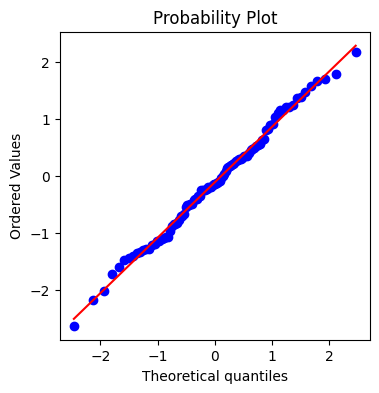

In [47]:
# QQ Plot
fig, ax = plt.subplots(figsize = (4,4))
print(type(norm_sample))
rnorm_sample = np.random.normal(0,1,100)
stats.probplot(norm_sample, dist = 'norm', plot = ax)
plt.show()

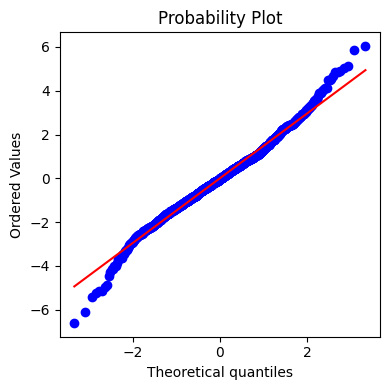

In [58]:
sp500_px = pd.read_csv(SP500_DATA_CSV)

nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))

fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

plt.tight_layout()
plt.show()

In [49]:
# Binomial Disribution
stats.binom.pmf(k = 2, n = 5, p = 0.1)

0.07289999999999992

In [50]:
stats.binom.cdf(k = 2, n = 5, p = 0.1)

0.99144

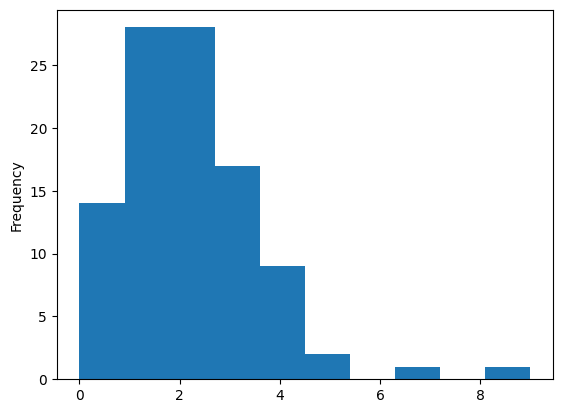

In [9]:
# Possion Distribution
# lambda = 2, 시간 단위 당 평균 2회. 100 시간 단위당 발생한 평균 건수
# 이항분포에서 np가 극도로 작아질 때, 푸아송 분포에 근접해진다.
sample = stats.poisson.rvs(2, size=100)

pd.Series(sample).plot.hist()
plt.show()

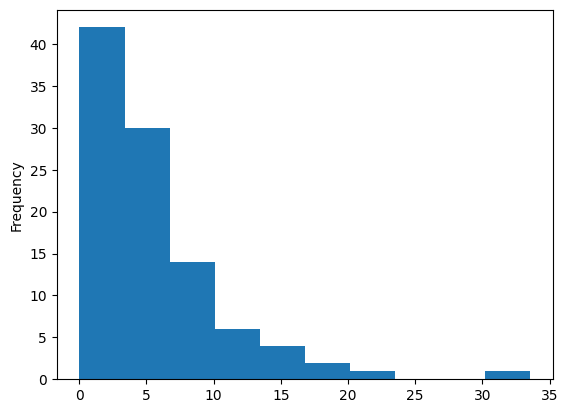

In [71]:
# 지수 분포: 사건과 사건 사이의 시간 분포
# 공학분야에서는 고장이 발생하는 시간을 모델링하거나, 프로세스 관리에서는 개별 고객 상담에 소요되는 시간을 모델링하는 데도 사용한다.
# 시간단위 당 평균사건 수 0.2
# 푸아송분포와 지수분포는 모두 lambda가 해당 기간동안 일정하게 유지된다는 가정에서 출발.
# 따라서 시간주기 또는 공간을 충분히 동일하도록 잘 나누어야 한다.
sample = stats.expon.rvs(scale=1/0.2, size=100) # 1분당 평균 발생 건수가 0.2인 지수분포 난수 100개
# sample = stats.expon.rvs(scale=5, size=100)

pd.Series(sample).plot.hist()
plt.show()

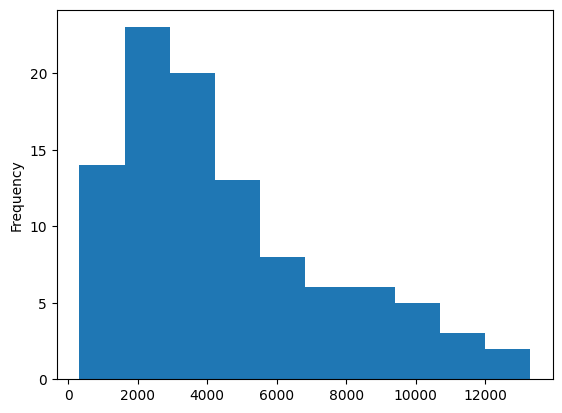

In [73]:
# 베이불 분포
# scale - 특성 수명
# shape - shape > 1: 시간이 지남에 따라 발생률 증가, shape <1: 시간이 지남에 따라 발생률 감소
sample = stats.weibull_min.rvs(1.5, scale=5000, size=100)
pd.Series(sample).plot.hist()
plt.show()